In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gdown
import os
import yaml
import sys
from os.path import abspath, dirname, join
current_dir = os.getcwd()
print(current_dir)
sys.path.insert(0, "/home/yif/Documents/KTH/git/diffusion_policy_escape_energy")

from core.controllers.quadrotor_diffusion_policy import build_networks_from_config
from core.dataset.ee2d_dataset import EscapeEnergy2DDataset
from core.trainers.quadrotor_diffusion_policy_trainer import PlanarQuadrotorDiffusionPolicyTrainer

/home/yif/Documents/KTH/git/diffusion_policy_escape_energy/train


/home/yif/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load config

In [3]:
with open("../config/config_ee2d.yaml", "r") as file:
    config = yaml.safe_load(file)

## Download dataset

In [4]:
dataset_path = "../dataset_escape_from_u_2d_8192_envs.joblib"
# if not os.path.isfile(dataset_path):
#     gdown.download(id="14safYt34YKn21vL9c_BsRHaG_URPB4Dp", output=dataset_path, quiet=False)

## Load dataset and instantiate the NN

In [5]:
num_data = 256*8
dataset = EscapeEnergy2DDataset(dataset_path=dataset_path, config=config, num_data=num_data)
print("Dataset loaded successfully.")

net = build_networks_from_config(config)
print("Networks initialized successfully.")

!!!!!! num_waypoints 20
!!!!!! action (40960, 2)
!!!!!! obs (40960, 2)
!!!!!! obstacle (40960, 18)
----------------------
Dataset loaded successfully.
Networks initialized successfully.


In [6]:
dataset.__getitem__(0)

{'action': array([[-0.21213696,  0.37814164],
        [-0.21213696,  0.37814164],
        [-0.21213696,  0.37814164],
        [-0.21213696,  0.37814164]]),
 'obs': array([-0.09771156,  0.31521384, -0.09771156,  0.31521384, -0.09771156,
         0.31521384, -0.09771156,  0.31521384,  0.74900321,  0.47769751,
         0.1308158 ,  0.71683225,  0.37556618,  0.13363765,  0.54086427,
         0.25336239,  0.08032968,  0.37948455,  0.28096569,  0.1043481 ,
         0.3083494 ,  0.33946949,  0.13880109,  0.25004882,  0.49505977,
         0.0621369 ]),
 'obstacle': array([[0.74900321, 0.47769751, 0.1308158 , 0.71683225, 0.37556618,
         0.13363765, 0.54086427, 0.25336239, 0.08032968, 0.37948455,
         0.28096569, 0.1043481 , 0.3083494 , 0.33946949, 0.13880109,
         0.25004882, 0.49505977, 0.0621369 ],
        [0.74900321, 0.47769751, 0.1308158 , 0.71683225, 0.37556618,
         0.13363765, 0.54086427, 0.25336239, 0.08032968, 0.37948455,
         0.28096569, 0.1043481 , 0.3083494 , 0

## Instantiate the trainer

In [7]:
import torch
torch.cuda.is_available() # TODO

True

In [8]:
trainer = PlanarQuadrotorDiffusionPolicyTrainer(
    net=net,
    dataset=dataset,
    config=config,
)

Using device: cuda
!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


## Start training

In [9]:
num_epochs = 200
trainer.train(num_epochs, save_ckpt_epoch=10)
trainer.save_checkpoint(f"ckpt_final_{num_epochs}_epochs.ckpt")

!!!!!! len(self.indices) 47104


Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   0%|          | 1/200 [00:11<38:57, 11.75s/it, loss=0.333]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   1%|          | 2/200 [00:23<37:49, 11.46s/it, loss=0.0442]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   2%|▏         | 3/200 [00:34<37:19, 11.37s/it, loss=0.0345]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   2%|▏         | 4/200 [00:45<37:06, 11.36s/it, loss=0.0288]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   2%|▎         | 5/200 [00:57<37:00, 11.39s/it, loss=0.0241]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   3%|▎         | 6/200 [01:08<36:55, 11.42s/it, loss=0.0209]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   4%|▎         | 7/200 [01:20<37:00, 11.51s/it, loss=0.0201]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   4%|▍         | 8/200 [01:32<37:28, 11.71s/it, loss=0.0184]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   4%|▍         | 9/200 [01:45<38:25, 12.07s/it, loss=0.0169]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   4%|▍         | 9/200 [01:58<38:25, 12.07s/it, loss=0.0163]

!!!!!! len(self.indices) 47104


Epoch:   5%|▌         | 10/200 [01:58<39:49, 12.57s/it, loss=0.0163]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   6%|▌         | 11/200 [02:12<40:30, 12.86s/it, loss=0.0158]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   6%|▌         | 12/200 [02:27<42:10, 13.46s/it, loss=0.0166]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   6%|▋         | 13/200 [02:41<43:06, 13.83s/it, loss=0.0153]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   7%|▋         | 14/200 [02:56<43:40, 14.09s/it, loss=0.0144]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   8%|▊         | 15/200 [03:11<44:00, 14.27s/it, loss=0.0145]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   8%|▊         | 16/200 [03:26<44:12, 14.42s/it, loss=0.0136]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   8%|▊         | 17/200 [03:41<44:55, 14.73s/it, loss=0.0125]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   9%|▉         | 18/200 [03:57<46:04, 15.19s/it, loss=0.0125]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  10%|▉         | 19/200 [04:14<46:49, 15.52s/it, loss=0.0118]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  10%|▉         | 19/200 [04:30<46:49, 15.52s/it, loss=0.013] 

!!!!!! len(self.indices) 47104


Epoch:  10%|█         | 20/200 [04:30<47:30, 15.83s/it, loss=0.013]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  10%|█         | 21/200 [04:46<47:37, 15.96s/it, loss=0.0124]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  11%|█         | 22/200 [05:03<47:38, 16.06s/it, loss=0.011] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  12%|█▏        | 23/200 [05:19<47:36, 16.14s/it, loss=0.0119]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  12%|█▏        | 24/200 [05:35<47:28, 16.19s/it, loss=0.011] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  12%|█▎        | 25/200 [05:52<47:16, 16.21s/it, loss=0.0116]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  13%|█▎        | 26/200 [06:08<47:04, 16.23s/it, loss=0.0111]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  14%|█▎        | 27/200 [06:24<46:52, 16.26s/it, loss=0.00995]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  14%|█▍        | 28/200 [06:41<46:38, 16.27s/it, loss=0.0104] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  14%|█▍        | 29/200 [06:57<46:24, 16.28s/it, loss=0.00983]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  14%|█▍        | 29/200 [07:13<46:24, 16.28s/it, loss=0.0102] 

!!!!!! len(self.indices) 47104


Epoch:  15%|█▌        | 30/200 [07:13<46:22, 16.37s/it, loss=0.0102]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  16%|█▌        | 31/200 [07:30<46:05, 16.36s/it, loss=0.011] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  16%|█▌        | 32/200 [07:46<45:49, 16.36s/it, loss=0.0101]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  16%|█▋        | 33/200 [08:02<45:32, 16.37s/it, loss=0.0103]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  17%|█▋        | 34/200 [08:19<45:16, 16.37s/it, loss=0.0093]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  18%|█▊        | 35/200 [08:35<45:04, 16.39s/it, loss=0.00999]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  18%|█▊        | 36/200 [08:52<44:50, 16.40s/it, loss=0.0102] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  18%|█▊        | 37/200 [09:08<44:33, 16.40s/it, loss=0.0085]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  19%|█▉        | 38/200 [09:25<44:18, 16.41s/it, loss=0.00881]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  20%|█▉        | 39/200 [09:43<45:48, 17.07s/it, loss=0.00886]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  20%|█▉        | 39/200 [10:01<45:48, 17.07s/it, loss=0.00927]

!!!!!! len(self.indices) 47104


Epoch:  20%|██        | 40/200 [10:02<46:41, 17.51s/it, loss=0.00927]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  20%|██        | 41/200 [10:18<45:30, 17.18s/it, loss=0.00993]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  21%|██        | 42/200 [10:37<46:29, 17.65s/it, loss=0.0096] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  22%|██▏       | 43/200 [10:54<45:57, 17.56s/it, loss=0.00916]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  22%|██▏       | 44/200 [11:12<45:31, 17.51s/it, loss=0.00874]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  22%|██▎       | 45/200 [11:31<46:37, 18.05s/it, loss=0.00885]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104



Batch:   0%|          | 0/184 [00:00<?, ?it/s, loss=0.00622]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  23%|██▎       | 46/200 [11:49<46:43, 18.21s/it, loss=0.008]  

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  24%|██▎       | 47/200 [12:08<46:44, 18.33s/it, loss=0.00816]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  24%|██▍       | 48/200 [12:27<46:40, 18.42s/it, loss=0.00788]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  24%|██▍       | 49/200 [12:45<46:31, 18.49s/it, loss=0.00807]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  24%|██▍       | 49/200 [13:04<46:31, 18.49s/it, loss=0.0074] 

!!!!!! len(self.indices) 47104


Epoch:  25%|██▌       | 50/200 [13:04<46:33, 18.62s/it, loss=0.0074]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  26%|██▌       | 51/200 [13:24<47:06, 18.97s/it, loss=0.0084]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  26%|██▌       | 52/200 [13:41<45:24, 18.41s/it, loss=0.00837]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  26%|██▋       | 53/200 [14:01<45:53, 18.73s/it, loss=0.00826]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  27%|██▋       | 54/200 [14:19<44:58, 18.49s/it, loss=0.00778]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  28%|██▊       | 55/200 [14:38<45:22, 18.77s/it, loss=0.00812]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  28%|██▊       | 56/200 [14:58<45:46, 19.07s/it, loss=0.00793]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  28%|██▊       | 57/200 [15:18<45:54, 19.26s/it, loss=0.00724]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  29%|██▉       | 58/200 [15:37<45:49, 19.36s/it, loss=0.00699]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  30%|██▉       | 59/200 [15:57<45:40, 19.44s/it, loss=0.00701]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  30%|██▉       | 59/200 [16:16<45:40, 19.44s/it, loss=0.00687]

!!!!!! len(self.indices) 47104


Epoch:  30%|███       | 60/200 [16:17<45:40, 19.57s/it, loss=0.00687]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  30%|███       | 61/200 [16:36<44:56, 19.40s/it, loss=0.00787]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  31%|███       | 62/200 [16:54<44:10, 19.20s/it, loss=0.00765]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  32%|███▏      | 63/200 [17:13<43:36, 19.10s/it, loss=0.00724]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  32%|███▏      | 64/200 [17:32<43:07, 19.03s/it, loss=0.00636]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  32%|███▎      | 65/200 [17:51<42:41, 18.97s/it, loss=0.00729]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  33%|███▎      | 66/200 [18:10<42:17, 18.93s/it, loss=0.00678]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  34%|███▎      | 67/200 [18:31<43:45, 19.74s/it, loss=0.00678]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  34%|███▍      | 68/200 [18:54<45:01, 20.46s/it, loss=0.0066] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  34%|███▍      | 69/200 [19:12<43:27, 19.91s/it, loss=0.00659]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  34%|███▍      | 69/200 [19:31<43:27, 19.91s/it, loss=0.00608]

!!!!!! len(self.indices) 47104


Epoch:  35%|███▌      | 70/200 [19:32<42:51, 19.78s/it, loss=0.00608]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  36%|███▌      | 71/200 [19:51<42:27, 19.75s/it, loss=0.00651]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  36%|███▌      | 72/200 [20:10<41:30, 19.46s/it, loss=0.00639]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104



Batch:   0%|          | 0/184 [00:00<?, ?it/s, loss=0.00606]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  36%|███▋      | 73/200 [20:29<40:49, 19.29s/it, loss=0.00685]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  37%|███▋      | 74/200 [20:50<41:47, 19.90s/it, loss=0.00608]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  38%|███▊      | 75/200 [21:10<41:10, 19.76s/it, loss=0.00625]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  38%|███▊      | 76/200 [21:29<40:36, 19.65s/it, loss=0.00604]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  38%|███▊      | 77/200 [21:49<40:09, 19.59s/it, loss=0.00598]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  39%|███▉      | 78/200 [22:08<39:44, 19.54s/it, loss=0.00799]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  40%|███▉      | 79/200 [22:27<39:19, 19.50s/it, loss=0.00644]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  40%|███▉      | 79/200 [22:49<39:19, 19.50s/it, loss=0.00563]

!!!!!! len(self.indices) 47104


Epoch:  40%|████      | 80/200 [22:50<40:41, 20.35s/it, loss=0.00563]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  40%|████      | 81/200 [23:09<39:44, 20.04s/it, loss=0.00531]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  41%|████      | 82/200 [23:30<40:07, 20.41s/it, loss=0.00561]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  42%|████▏     | 83/200 [23:52<40:23, 20.72s/it, loss=0.00574]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  42%|████▏     | 84/200 [24:13<40:20, 20.87s/it, loss=0.00518]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  42%|████▎     | 85/200 [24:34<40:12, 20.98s/it, loss=0.00483]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  43%|████▎     | 86/200 [24:55<40:02, 21.07s/it, loss=0.00527]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  44%|████▎     | 87/200 [25:17<39:48, 21.14s/it, loss=0.00481]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  44%|████▍     | 88/200 [25:38<39:28, 21.15s/it, loss=0.00519]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  44%|████▍     | 89/200 [25:59<39:07, 21.15s/it, loss=0.00494]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  44%|████▍     | 89/200 [26:20<39:07, 21.15s/it, loss=0.0056] 

!!!!!! len(self.indices) 47104


Epoch:  45%|████▌     | 90/200 [26:21<38:56, 21.24s/it, loss=0.0056]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  46%|████▌     | 91/200 [26:39<37:10, 20.46s/it, loss=0.00509]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  46%|████▌     | 92/200 [26:59<36:15, 20.15s/it, loss=0.00549]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  46%|████▋     | 93/200 [27:22<37:35, 21.08s/it, loss=0.00518]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  47%|████▋     | 94/200 [27:40<35:25, 20.06s/it, loss=0.00517]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  48%|████▊     | 95/200 [28:00<35:10, 20.10s/it, loss=0.00493]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  48%|████▊     | 96/200 [28:19<34:18, 19.79s/it, loss=0.00546]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  48%|████▊     | 97/200 [28:41<34:59, 20.38s/it, loss=0.00438]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  49%|████▉     | 98/200 [29:01<34:40, 20.40s/it, loss=0.0047] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  50%|████▉     | 99/200 [29:21<34:17, 20.37s/it, loss=0.00472]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  50%|████▉     | 99/200 [29:42<34:17, 20.37s/it, loss=0.00436]

!!!!!! len(self.indices) 47104


Epoch:  50%|█████     | 100/200 [29:42<34:05, 20.46s/it, loss=0.00436]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  50%|█████     | 101/200 [30:02<33:45, 20.46s/it, loss=0.00474]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  51%|█████     | 102/200 [30:23<33:31, 20.53s/it, loss=0.00529]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  52%|█████▏    | 103/200 [30:45<33:46, 20.90s/it, loss=0.00483]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  52%|█████▏    | 104/200 [31:07<33:50, 21.15s/it, loss=0.00455]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  52%|█████▎    | 105/200 [31:28<33:45, 21.32s/it, loss=0.00464]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  53%|█████▎    | 106/200 [31:50<33:34, 21.44s/it, loss=0.00455]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  54%|█████▎    | 107/200 [32:12<33:23, 21.54s/it, loss=0.00454]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  54%|█████▍    | 108/200 [32:34<33:05, 21.58s/it, loss=0.00434]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  55%|█████▍    | 109/200 [32:54<32:16, 21.28s/it, loss=0.00431]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  55%|█████▍    | 109/200 [33:12<32:16, 21.28s/it, loss=0.00405]

!!!!!! len(self.indices) 47104


Epoch:  55%|█████▌    | 110/200 [33:12<30:29, 20.33s/it, loss=0.00405]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  56%|█████▌    | 111/200 [33:31<29:37, 19.97s/it, loss=0.00426]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  56%|█████▌    | 112/200 [33:51<29:09, 19.88s/it, loss=0.00474]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  56%|█████▋    | 113/200 [34:11<28:45, 19.84s/it, loss=0.00386]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  57%|█████▋    | 114/200 [34:32<28:59, 20.22s/it, loss=0.00405]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  57%|█████▊    | 115/200 [34:51<28:22, 20.04s/it, loss=0.00393]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  58%|█████▊    | 116/200 [35:12<28:26, 20.32s/it, loss=0.00419]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  58%|█████▊    | 117/200 [35:32<27:51, 20.14s/it, loss=0.00392]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  59%|█████▉    | 118/200 [35:52<27:27, 20.09s/it, loss=0.00393]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  60%|█████▉    | 119/200 [36:12<27:01, 20.02s/it, loss=0.00386]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  60%|█████▉    | 119/200 [36:32<27:01, 20.02s/it, loss=0.00363]

!!!!!! len(self.indices) 47104


Epoch:  60%|██████    | 120/200 [36:32<26:46, 20.08s/it, loss=0.00363]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  60%|██████    | 121/200 [36:52<26:23, 20.04s/it, loss=0.00368]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  61%|██████    | 122/200 [37:12<26:01, 20.02s/it, loss=0.0037] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  62%|██████▏   | 123/200 [37:32<25:37, 19.97s/it, loss=0.00351]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  62%|██████▏   | 124/200 [37:52<25:17, 19.97s/it, loss=0.0038] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  62%|██████▎   | 125/200 [38:12<24:56, 19.95s/it, loss=0.00402]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  63%|██████▎   | 126/200 [38:32<24:36, 19.95s/it, loss=0.00391]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  64%|██████▎   | 127/200 [38:52<24:17, 19.96s/it, loss=0.00366]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  64%|██████▍   | 128/200 [39:15<24:59, 20.83s/it, loss=0.00349]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  64%|██████▍   | 129/200 [39:35<24:37, 20.81s/it, loss=0.00382]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  64%|██████▍   | 129/200 [39:56<24:37, 20.81s/it, loss=0.00374]

!!!!!! len(self.indices) 47104


Epoch:  65%|██████▌   | 130/200 [39:56<24:21, 20.88s/it, loss=0.00374]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  66%|██████▌   | 131/200 [40:18<24:17, 21.12s/it, loss=0.00339]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  66%|██████▌   | 132/200 [40:41<24:32, 21.65s/it, loss=0.00379]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  66%|██████▋   | 133/200 [41:01<23:30, 21.06s/it, loss=0.00327]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  67%|██████▋   | 134/200 [41:20<22:26, 20.40s/it, loss=0.00317]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  68%|██████▊   | 135/200 [41:40<22:04, 20.38s/it, loss=0.00318]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  68%|██████▊   | 136/200 [42:00<21:41, 20.34s/it, loss=0.00318]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  68%|██████▊   | 137/200 [42:20<21:18, 20.29s/it, loss=0.00336]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  69%|██████▉   | 138/200 [42:41<21:00, 20.33s/it, loss=0.003]  

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  70%|██████▉   | 139/200 [43:01<20:42, 20.36s/it, loss=0.0033]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  70%|██████▉   | 139/200 [43:22<20:42, 20.36s/it, loss=0.00309]

!!!!!! len(self.indices) 47104


Epoch:  70%|███████   | 140/200 [43:22<20:26, 20.45s/it, loss=0.00309]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  70%|███████   | 141/200 [43:42<20:01, 20.36s/it, loss=0.0035] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  71%|███████   | 142/200 [44:01<19:22, 20.05s/it, loss=0.00327]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  72%|███████▏  | 143/200 [44:21<18:49, 19.81s/it, loss=0.00316]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  72%|███████▏  | 144/200 [44:44<19:29, 20.89s/it, loss=0.00314]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  72%|███████▎  | 145/200 [45:04<18:47, 20.51s/it, loss=0.00306]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  73%|███████▎  | 146/200 [45:25<18:48, 20.90s/it, loss=0.00284]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  74%|███████▎  | 147/200 [45:47<18:40, 21.15s/it, loss=0.00302]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  74%|███████▍  | 148/200 [46:09<18:28, 21.32s/it, loss=0.00284]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  74%|███████▍  | 149/200 [46:30<18:03, 21.25s/it, loss=0.00304]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  74%|███████▍  | 149/200 [46:48<18:03, 21.25s/it, loss=0.00293]

!!!!!! len(self.indices) 47104


Epoch:  75%|███████▌  | 150/200 [46:49<17:04, 20.50s/it, loss=0.00293]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  76%|███████▌  | 151/200 [47:07<16:09, 19.78s/it, loss=0.00305]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  76%|███████▌  | 152/200 [47:26<15:38, 19.55s/it, loss=0.00293]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  76%|███████▋  | 153/200 [47:45<15:10, 19.38s/it, loss=0.00295]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  77%|███████▋  | 154/200 [48:09<15:58, 20.84s/it, loss=0.00274]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  78%|███████▊  | 155/200 [48:27<15:01, 20.03s/it, loss=0.00276]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  78%|███████▊  | 156/200 [48:48<14:45, 20.12s/it, loss=0.0028] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  78%|███████▊  | 157/200 [49:06<14:09, 19.77s/it, loss=0.00295]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  79%|███████▉  | 158/200 [49:28<14:10, 20.25s/it, loss=0.00257]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  80%|███████▉  | 159/200 [49:48<13:43, 20.08s/it, loss=0.00269]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  80%|███████▉  | 159/200 [50:07<13:43, 20.08s/it, loss=0.0028] 

!!!!!! len(self.indices) 47104


Epoch:  80%|████████  | 160/200 [50:08<13:22, 20.07s/it, loss=0.0028]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  80%|████████  | 161/200 [50:30<13:29, 20.76s/it, loss=0.00274]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  81%|████████  | 162/200 [50:53<13:32, 21.37s/it, loss=0.00274]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  82%|████████▏ | 163/200 [51:12<12:51, 20.84s/it, loss=0.00269]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  82%|████████▏ | 164/200 [51:32<12:16, 20.46s/it, loss=0.00252]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  82%|████████▎ | 165/200 [51:51<11:41, 20.04s/it, loss=0.00258]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  83%|████████▎ | 166/200 [52:13<11:40, 20.61s/it, loss=0.00258]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  84%|████████▎ | 167/200 [52:36<11:47, 21.44s/it, loss=0.00255]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  84%|████████▍ | 168/200 [52:55<10:56, 20.52s/it, loss=0.00256]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  84%|████████▍ | 169/200 [53:17<10:54, 21.11s/it, loss=0.00255]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  84%|████████▍ | 169/200 [53:38<10:54, 21.11s/it, loss=0.00255]

!!!!!! len(self.indices) 47104


Epoch:  85%|████████▌ | 170/200 [53:38<10:29, 20.98s/it, loss=0.00255]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  86%|████████▌ | 171/200 [53:58<09:59, 20.66s/it, loss=0.0025] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  86%|████████▌ | 172/200 [54:17<09:23, 20.12s/it, loss=0.00271]A

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  86%|████████▋ | 173/200 [54:39<09:21, 20.80s/it, loss=0.00264]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  87%|████████▋ | 174/200 [55:01<09:13, 21.28s/it, loss=0.00262]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  88%|████████▊ | 175/200 [55:24<08:59, 21.56s/it, loss=0.00253]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  88%|████████▊ | 176/200 [55:45<08:37, 21.57s/it, loss=0.00241]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  88%|████████▊ | 177/200 [56:03<07:53, 20.58s/it, loss=0.0023] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  89%|████████▉ | 178/200 [56:24<07:31, 20.50s/it, loss=0.00255]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  90%|████████▉ | 179/200 [56:44<07:09, 20.47s/it, loss=0.00252]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  90%|████████▉ | 179/200 [57:05<07:09, 20.47s/it, loss=0.00237]

!!!!!! len(self.indices) 47104


Epoch:  90%|█████████ | 180/200 [57:05<06:51, 20.58s/it, loss=0.00237]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  90%|█████████ | 181/200 [57:27<06:36, 20.88s/it, loss=0.00241]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  91%|█████████ | 182/200 [57:49<06:21, 21.22s/it, loss=0.00255]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  92%|█████████▏| 183/200 [58:10<06:04, 21.42s/it, loss=0.00241]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  92%|█████████▏| 184/200 [58:32<05:44, 21.56s/it, loss=0.00235]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  92%|█████████▎| 185/200 [58:51<05:11, 20.77s/it, loss=0.00241]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  93%|█████████▎| 186/200 [59:11<04:47, 20.56s/it, loss=0.00238]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  94%|█████████▎| 187/200 [59:31<04:24, 20.32s/it, loss=0.00239]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  94%|█████████▍| 188/200 [59:51<04:02, 20.19s/it, loss=0.0024] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  94%|█████████▍| 189/200 [1:00:11<03:40, 20.07s/it, loss=0.00242]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  94%|█████████▍| 189/200 [1:00:20<03:30, 19.15s/it, loss=0.00242]


KeyboardInterrupt: 

## Trainnig data visualization
The training data was generated using a MPPI-CBF controller from [shaoanlu/mppi_cbf](https://github.com/shaoanlu/mppi_cbf) repository. 

In [10]:
import joblib
import numpy as np
from matplotlib import pyplot as plt

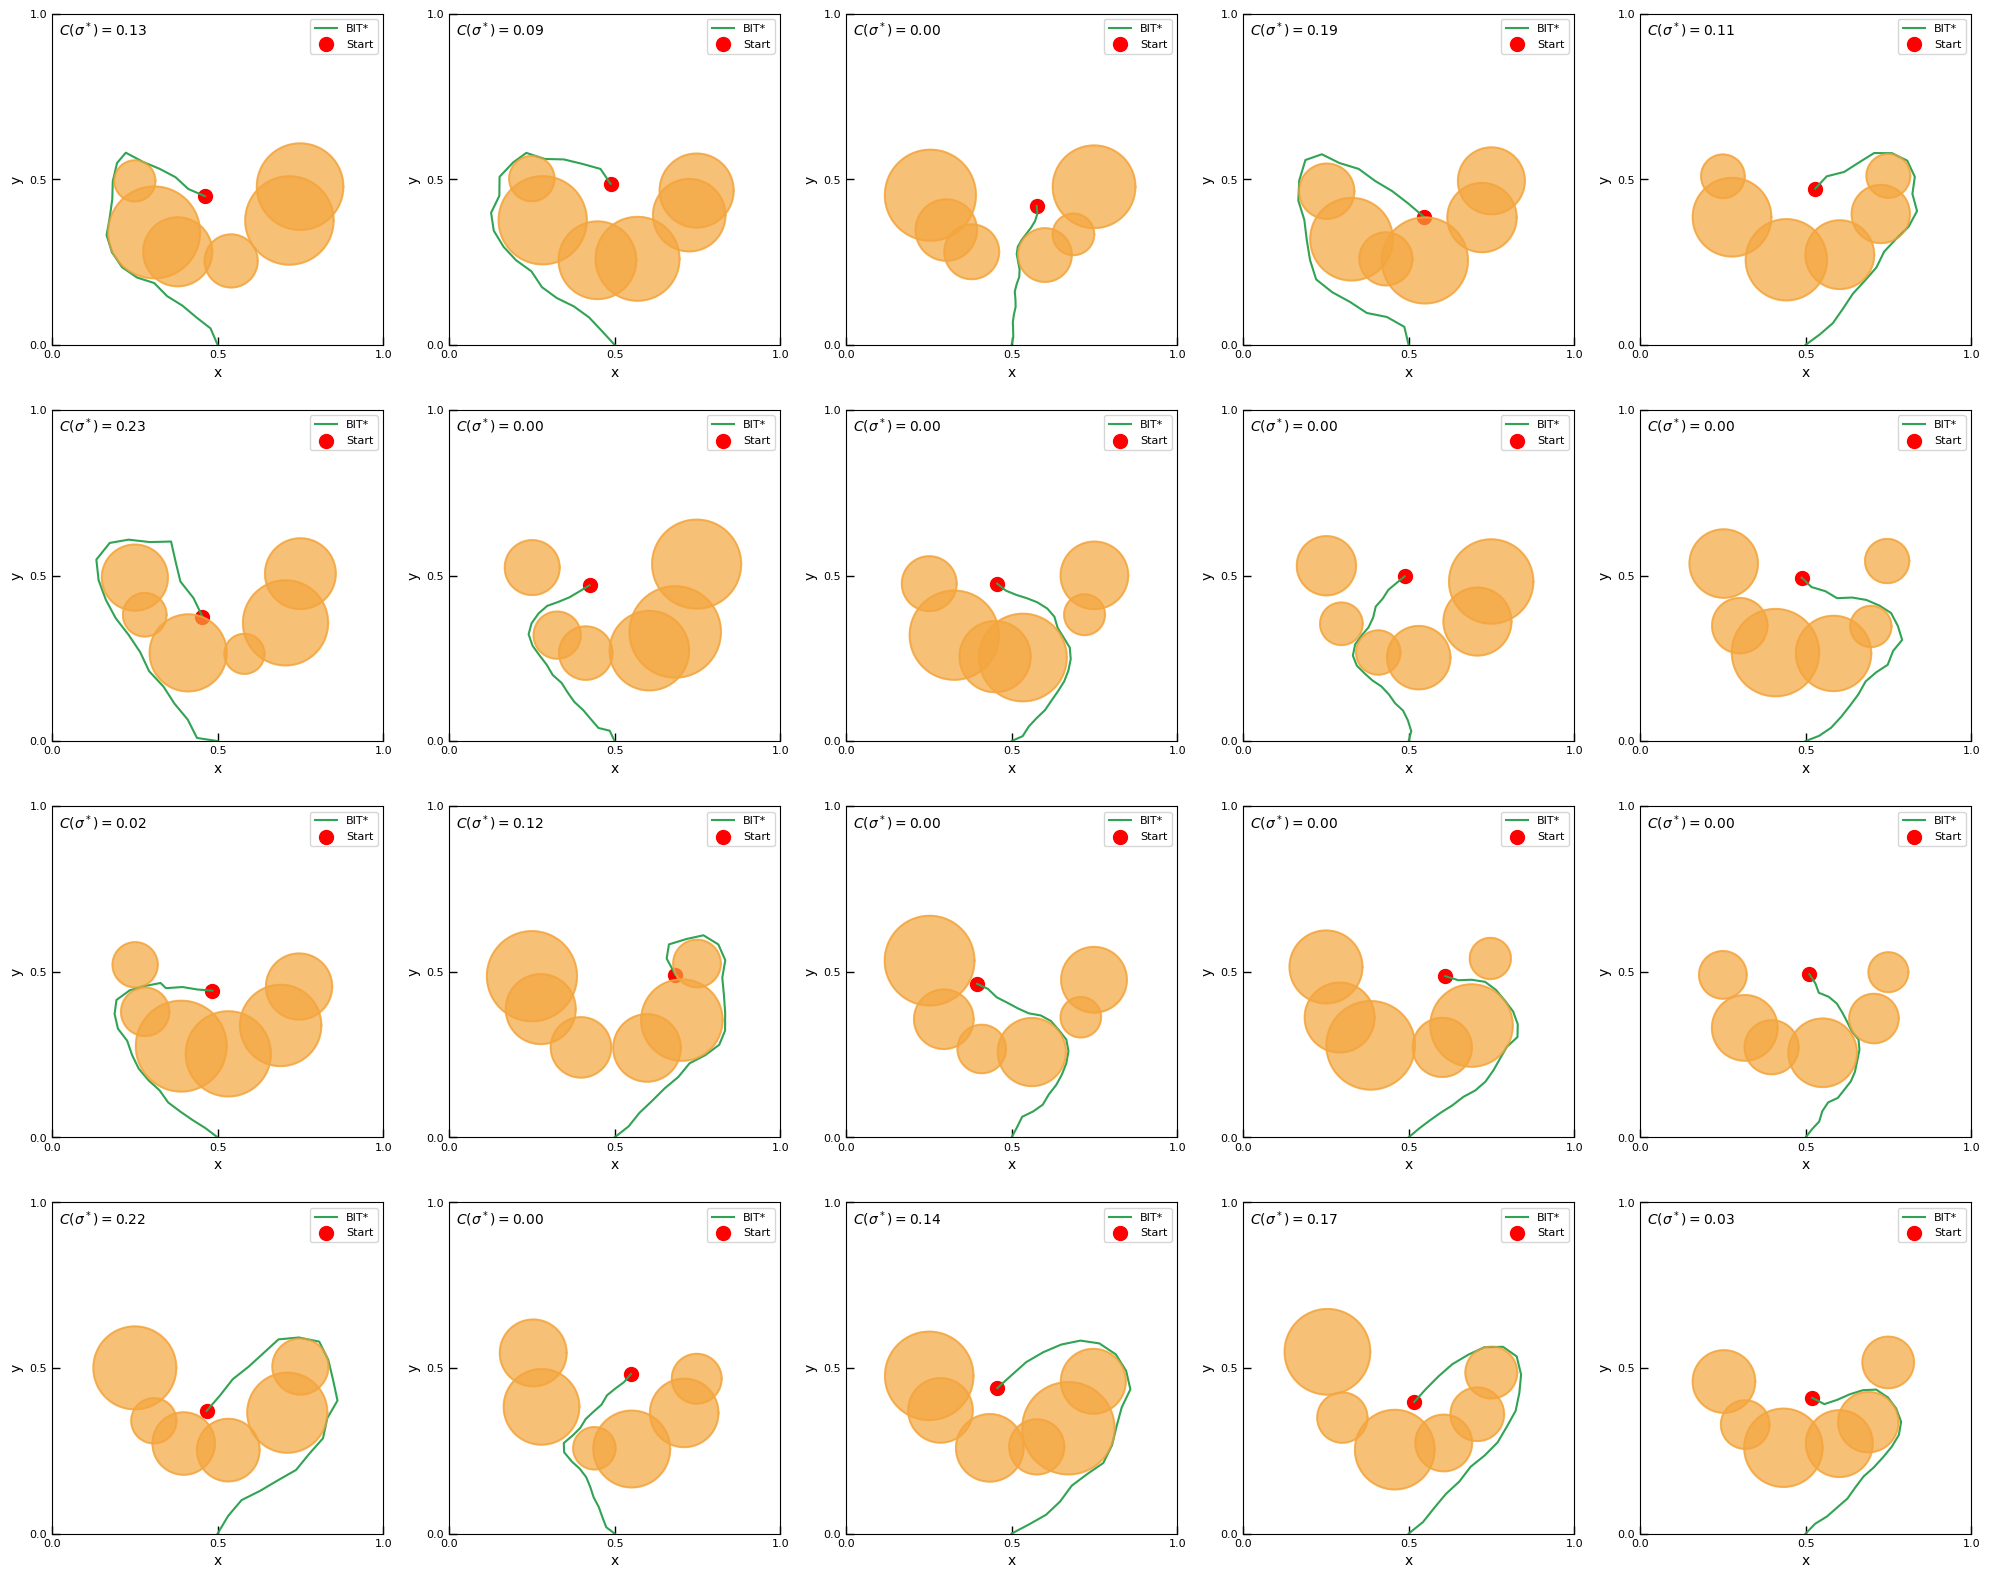

In [13]:
from dataset.escape_from_u_generator import plot_multiple
trn_data = joblib.load("../dataset_escape_from_u_2d_8192_envs.joblib")
num_envs = 20
sol_path_list = []
cost_list = []
centers_list = []
rads_list = []
for env_idx in range(num_envs):
    sol_path_list.append(trn_data["paths"][env_idx])
    cost_list.append(trn_data["costs"][env_idx])
    centers_list.append(trn_data["ellipse_centers"][env_idx])
    rads_list.append(trn_data["ellipse_radii"][env_idx])

plot_multiple(sol_path_list, cost_list, centers_list, rads_list)

In [26]:
for key, value in trn_data.items():
    print(f"{key}: {len(value)}")
print('costs', type(trn_data["costs"]))
print('costs', trn_data["costs"])
print('paths', trn_data["paths"])
print('object_starts', trn_data["object_starts"])


costs: 6
paths: 6
object_starts: 6
ellipse_centers: 6
ellipse_radii: 6
costs <class 'numpy.ndarray'>
costs [0.         0.00032877 0.         0.         0.         0.03209365]
paths [[[0.45580925 0.68537036]
  [0.41834608 0.62996103]
  [0.40587738 0.67183557]
  [0.45284282 0.61964025]
  [0.486888   0.60014907]
  [0.54439431 0.65190197]
  [0.60222496 0.67146199]
  [0.63987722 0.61895391]
  [0.65420421 0.6106548 ]
  [0.67334748 0.55435731]
  [0.70662757 0.58796657]
  [0.7679419  0.60811095]
  [0.74965366 0.65252623]
  [0.77285868 0.61885425]
  [0.7803659  0.598214  ]
  [0.7633884  0.55428415]
  [0.77043103 0.52532142]
  [0.79925971 0.49306505]
  [0.79429885 0.43389678]
  [0.75424768 0.43540488]]

 [[0.61691686 0.59070396]
  [0.62100338 0.53397404]
  [0.58773767 0.50142582]
  [0.6541713  0.52666671]
  [0.71135764 0.54752603]
  [0.69974045 0.5578557 ]
  [0.73802118 0.50268235]
  [0.71164017 0.46677389]
  [0.76657945 0.49902675]
  [0.73207873 0.44544288]
  [0.70091109 0.46776482]
  [0.761698